In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


HomePlanet: The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.

Cabin: The cabin number where the passenger is staying.

Destination: The planet the passenger will be debarking to.

Age: The age of the passenger.

VIP: Whether the passenger has paid for special VIP service during the voyage.

RoomService: Amount the passenger has billed for room service.

FoodCourt: Amount the passenger has billed at the food court.

ShoppingMall: Amount the passenger has billed at the shopping mall.

Spa: Amount the passenger has billed at the spa.

VRDeck: Amount the passenger has billed at the VR deck.

Name: The name of the passenger.

Transported: Whether the passenger was transported to another dimension.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
data.columns[data.isnull().any()]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [5]:
data[data.columns[data.isnull().any()]].isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [6]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
dtype: float64

In [7]:
data.loc[data['Transported'] == True, 'Transported'].count() / data['Transported'].count()

0.5036236051995858

It seems our data is balanced.

In [8]:
print(data.PassengerId.nunique())
print(data.Name.nunique())

8693
8473


In [9]:
data.Name.fillna(value='No_name', inplace=True)

I believe family has a role in survival, so let's make a column for surnames:

In [10]:
surname = []
for name in data.Name:
    a = name.split()
    surname.append(a[-1])
data['Surname'] = surname

I will drop name and id column.

In [11]:
data.drop(labels=['PassengerId', 'Name'], axis=1, inplace = True)

Also people who was in Cryosleep couldn't spend any money, because of that i will fill their null values with zero.

In [12]:
m = data.loc[data['CryoSleep'] == True][['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']]
m.fillna(value=0, inplace=True)
data.update(m)
data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Surname
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Noxnuther
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Mondalley
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Connon
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Hontichre


Total Spending could be important, in order to calculate it, i will fill null values of columns which I will use.

In [13]:
roomservice_median = data['RoomService'].median()
data['RoomService'].fillna(value=roomservice_median, inplace=True)

foodcourt_median = data['FoodCourt'].median()
data['FoodCourt'].fillna(value=foodcourt_median, inplace=True)

shoppingmall_median = data['ShoppingMall'].median()
data['ShoppingMall'].fillna(value=shoppingmall_median, inplace=True)

spa_median = data['Spa'].median()
data['Spa'].fillna(value=spa_median, inplace=True)

vrdeck_median = data['VRDeck'].median()
data['VRDeck'].fillna(value=vrdeck_median, inplace=True)

In [14]:
data['Total Spending'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

In [15]:
data['Total Spending']

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Name: Total Spending, Length: 8693, dtype: float64

In [16]:
X = data.drop('Transported', axis=1)
y = pd.DataFrame(data['Transported'])

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), 
        ("scaler", StandardScaler()), 
    ])

from sklearn.compose import ColumnTransformer

num_attribs = list(X.select_dtypes(exclude='object').columns)
cat_attribs = list(X.select_dtypes(include='object').columns)

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [18]:
X_prepared = pd.DataFrame(preprocess_pipeline.fit_transform(X[num_attribs + cat_attribs]), columns=X.columns)

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_LE = label_encoder.fit_transform(y)
y_LE = pd.DataFrame(y_LE, columns=y.columns)

Let's look for relationships between features and target values.

In [20]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi = pd.DataFrame(make_mi_scores(X_prepared, y_LE))
corr = pd.DataFrame(X_prepared[X_prepared.columns].corrwith(y_LE['Transported']),
                    columns=['Correlation'])
s_corr = pd.DataFrame(X_prepared[X_prepared.columns].corrwith(y_LE['Transported'],
                      method='spearman'), columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation

,MI Scores,Correlation,Spearman_Correlation
RoomService,0.132039,-0.199514,-0.419474
ShoppingMall,0.111990,0.460132,0.460132
Age,0.073734,-0.218545,-0.366099
CryoSleep,0.073225,-0.241124,-0.363899
VIP,0.063886,-0.204874,-0.347008
Destination,0.048172,0.009391,-0.227018
Cabin,0.045803,0.045583,-0.186388
Total Spending,0.027967,0.014725,0.015016
Spa,0.026893,-0.052972,-0.055254
FoodCourt,0.012173,0.115461,0.135782


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_prepared, y_LE, train_size=0.8,
                                                      test_size=0.2, random_state=42, stratify = y)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[13]),
    layers.Dense(512, activation='relu', input_shape=[13]),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                               min_delta=0.001,
                                               restore_best_weights=True)

lr_rop = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience= 5,
                                              factor = np.sqrt(0.2), verbose = 1,
                                              min_lr = 5e-10)

2022-10-22 17:13:08.188377: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 17:13:08.412529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 17:13:08.413747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-22 17:13:08.416188: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

2022-10-22 17:13:11.958579: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
218/218 [==============================] - 6s 12ms/step - loss: 0.6592 - binary_accuracy: 0.7091 - val_loss: 0.6019 - val_binary_accuracy: 0.6993
Epoch 2/1000
218/218 [==============================] - 2s 8ms/step - loss: 0.5320 - binary_accuracy: 0.7400 - val_loss: 0.4934 - val_binary_accuracy: 0.7177
Epoch 3/1000
218/218 [==============================] - 1s 6ms/step - loss: 0.4907 - binary_accuracy: 0.7643 - val_loss: 0.4785 - val_binary_accuracy: 0.7585
Epoch 4/1000
218/218 [==============================] - 2s 7ms/step - loss: 0.4857 - binary_accuracy: 0.7668 - val_loss: 0.4421 - val_binary_accuracy: 0.7792
Epoch 5/1000
218/218 [==============================] - 1s 6ms/step - loss: 0.4773 - binary_accuracy: 0.7725 - val_loss: 0.4738 - val_binary_accuracy: 0.7510
Epoch 6/1000
218/218 [==============================] - 1s 6ms/step - loss: 0.4734 - binary_accuracy: 0.7768 - val_loss: 0.4337 - val_binary_accuracy: 0.7826
Epoch 7/1000
218/218 [=============================

<AxesSubplot:title={'center':'Accuracy'}>

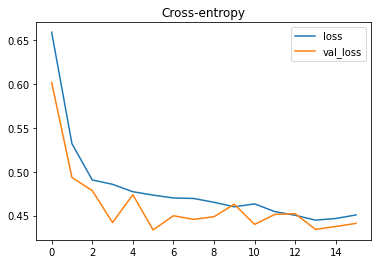

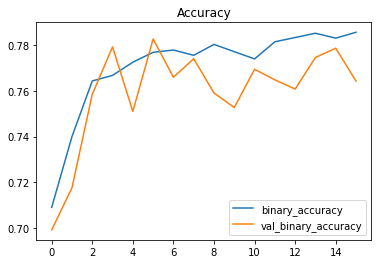

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    #batch_size=512,
    epochs=1000,
    callbacks=[early_stopping, lr_rop],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [24]:
data_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
data_test_copy = data_test.copy(deep=True)

In [25]:
data_test_copy.Name.fillna(value='No_name', inplace=True)

surname = []
for name in data_test_copy.Name:
    a = name.split()
    surname.append(a[-1])
data_test_copy['Surname'] = surname

data_test_copy.drop(labels=['PassengerId', 'Name'], axis=1, inplace = True)

m = data_test_copy.loc[data_test_copy['CryoSleep'] == True][['RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck']]
m.fillna(value=0, inplace=True)
data_test_copy.update(m)

roomservice_median = data_test_copy['RoomService'].median()
data_test_copy['RoomService'].fillna(value=roomservice_median, inplace=True)

foodcourt_median = data_test_copy['FoodCourt'].median()
data_test_copy['FoodCourt'].fillna(value=foodcourt_median, inplace=True)

shoppingmall_median = data_test_copy['ShoppingMall'].median()
data_test_copy['ShoppingMall'].fillna(value=shoppingmall_median, inplace=True)

spa_median = data_test_copy['Spa'].median()
data_test_copy['Spa'].fillna(value=spa_median, inplace=True)

vrdeck_median = data_test_copy['VRDeck'].median()
data_test_copy['VRDeck'].fillna(value=vrdeck_median, inplace=True)

data_test_copy['Total Spending'] = data_test_copy['RoomService'] + data_test_copy['FoodCourt'] + data_test_copy['ShoppingMall'] + data_test_copy['Spa'] + data_test_copy['VRDeck']

data_test_copy

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Surname,Total Spending
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Carsoning,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Peckers,2832.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Unhearfus,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Caltilter,7418.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Harperez,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Peter,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Scheron,1018.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Pore,0.0
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Conale,3203.0


In [26]:
data_test_prepared = preprocess_pipeline.transform(data_test_copy[num_attribs + cat_attribs])
data_test_prepared = pd.DataFrame(data_test_prepared, columns = data_test_copy.columns)

In [27]:
pred_data_test_prepared = model.predict(data_test_prepared)
pred_data_test_prepared

array([[0.97906315],
       [0.08408583],
       [0.98796743],
       ...,
       [0.968292  ],
       [0.8438846 ],
       [0.985782  ]], dtype=float32)

In [28]:
pred_data_test_prepared[pred_data_test_prepared <= 0.5] = 0 # False
pred_data_test_prepared[pred_data_test_prepared > 0.5] = 1 # True
pred_data_test_prepared

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)